# Lab 6: Neural networks 

In this lab we will build dense neural networks on the MNIST dataset.

Make sure you read the tutorial for this lab first.

## Load the data and create train-test splits

In [1]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Download MNIST data. Takes a while the first time.
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)

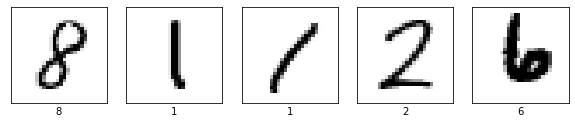

In [3]:
# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show();

In [4]:
# For MNIST, there exists a predefined stratified train-test split of 60000-10000. We therefore don't shuffle or stratify here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=0)

## Exercise 1: Preprocessing
* Normalize the data: map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. 
* Store the floating-point values in `X_train_normalized` and `X_test_normalized`.
* Map the class label to a on-hot-encoded value. Store in `y_train_encoded` and `y_test_encoded`.

In [5]:
X_train_normalized = X_train.reshape((X_train.shape[0], 28**2))/255
y_train_encoded = tf.one_hot(y_train, 10)

X_test_normalized = X_test.reshape((X_test.shape[0], 28**2))/255
y_test_encoded = tf.one_hot(y_test, 10)

In [6]:
print(X_train_normalized.shape, X_test_normalized.shape)

(60000, 784) (10000, 784)


In [7]:
print(y_train_encoded.shape, y_test_encoded.shape)

(60000, 10) (10000, 10)


## Exercise 2: Create a deep neural net model

Implement a `create_model` function which defines the topography of the deep neural net, specifying the following:

* The number of layers in the deep neural net: Use 2 dense layers for now.
* The number of nodes in each layer: these are parameters of your function.
* Any regularization layers. Add at least one dropout layer.
* The optimizer and learning rate. Make the learning rate a parameter of your function as well.

Consider:
* What should be the shape of the input layer?
* Which activation function you will need for the last layer, since this is a 10-class classification problem?

In [8]:
### Create and compile a 'deep' neural net
def create_model(*args, learning_rate=0.001):
    model = keras.Sequential()
    model.add(keras.Input(784))
    
    for i in range(0, len(args), 2):
        model.add(keras.layers.Dense(args[i], activation="sigmoid"))
        model.add(keras.layers.Dropout(args[i+1]))
        
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Softmax())
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=[keras.metrics.CategoricalAccuracy()])
    
    return model

## Exercise 3: Create a training function
Implement a `train_model` function which trains and evaluates a given model.
It should do a train-validation split and report the train and validation loss and accuracy, and return the training history.

In [9]:
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
    model: the model to train
    X, y: the training data and labels
    validation_split: the percentage of data set aside for the validation set
    epochs: the number of epochs to train for
    batch_size: the batch size for minibatch SGD
    """
    
    model.fit(X, y,
             batch_size=batch_size,
             epochs=epochs,
             validation_split=validation_split,
             verbose=0)
    
    return model.history

## Exercise 4: Evaluate the model

Train the model with a learning rate of 0.003, 50 epochs, batch size 4000, and a validation set that is 20% of the total training data.
Use default settings otherwise. Plot the learning curve of the loss, validation loss, accuracy, and validation accuracy. Finally, report the performance on the test set.

Feel free to use the plotting function below, or implement the callback from the tutorial to see results in real time.

In [29]:
model = create_model(32, 0.3, learning_rate=0.003)
history = train_model(model, X_train_normalized, y_train_encoded, validation_split=0.2, epochs=50, batch_size=4000)

In [43]:
# Helper plotting function
#
# history: the history object returned by the fit function
# list_of_metrics: the metrics to plot
def plot_curve(history, show_loss=True):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    epochs = np.array(history.epoch) + 1
    hist = pd.DataFrame(history.history)
    
    if show_loss:
        plt.plot(epochs, hist["loss"], label="loss", lw=2, c="red")
        plt.plot(epochs, hist["val_loss"], label="val_loss", lw=2, c="blue")
    plt.plot(epochs, hist["categorical_accuracy"], label="accuracy", lw=2, c="red", linestyle="--")
    plt.plot(epochs, hist["val_categorical_accuracy"], label="val_accuracy", lw=2, linestyle="--", c="blue")

    plt.legend()

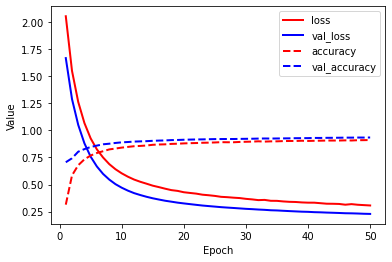

In [30]:
# even such network does very well
# it is too small to overfit and achieves 93% accuracy on test data
plot_curve(history)

In [31]:
model.evaluate(X_test_normalized, y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.2378 - categorical_accuracy: 0.9312


[0.23783676326274872, 0.9312000274658203]

## Exercise 5: Optimize the model

Try to optimize the model, either manually or with a tuning method. At least optimize the following:
* the number of hidden layers 
* the number of nodes in each layer
* the amount of dropout layers and the dropout rate

Try to reach at least 96% accuracy against the test set.

Plan:
* Choose some big enough model and some popular optimizer(e.g. Adam).
* See how it does on different batch sizes(aim for smaller ones, as they can be computed faster and take less memory).
* For best batch size, check if something can be improved with tuned learning rate.
* If model overfits, try adding regularization.

The above is usually done on some subset of train data, but to speed things up, it is done on whole train data here. If after completing the plan model still performs poorly, one can try again with different architecture, data preprocessing, optimizer(and its params) etc.

In [32]:
model = create_model(100, 0.0)
model.summary()
# let's try such model
# dropout zeroed for now

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 softmax_3 (Softmax)         (None, 10)                0         
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
def plot_by_value(param, values, X, y, model_args=[], model_kwargs={}, train_kwargs={}, train_param=True):
    
    results = []
    for val in values:
        if train_param:
            train_kwargs[param] = val
        else:
            model_kwargs[param] = val
        model = create_model(*model_args, **model_kwargs)
        history = train_model(model, X, y, **train_kwargs).history
        results.append([history["categorical_accuracy"], history["val_categorical_accuracy"]])
        
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy(solid - train)")
    
    epochs = np.arange(1, len(results[0][0]) + 1)

    for i, res in enumerate(results):
        plt.plot(epochs, res[0], label=values[i], lw=2, c=f"C{i}")
        plt.plot(epochs, res[1], lw=2, c=f"C{i}", linestyle="--")

    plt.legend(title=param)

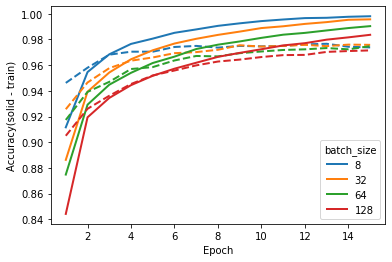

In [38]:
plot_by_value("batch_size", [8, 32, 64, 128], X_train_normalized, y_train_encoded, 
              train_kwargs={"epochs": 15}, model_args=[100, 0.0])
# all did well, but batch of size 8 looks promising,
# it is also the smallest

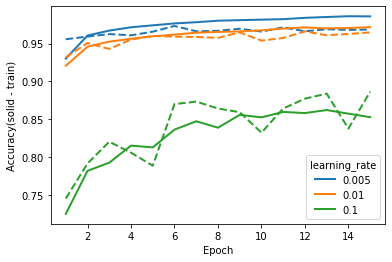

In [39]:
plot_by_value("learning_rate", [0.005, 0.01, 0.1], X_train_normalized, y_train_encoded, 
              train_kwargs={"epochs": 15, "batch_size": 8}, model_args=[100, 0.0], train_param=False)
# no step was better from default 0.001(seen on plot above)

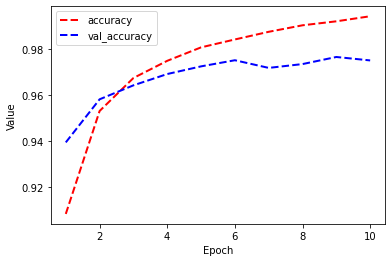

In [45]:
# recap best model with no regularization so far
model = create_model(100, 0.0)
history = train_model(model, X_train_normalized, y_train_encoded, validation_split=0.2, epochs=10, batch_size=8)
plot_curve(history, show_loss=False)

In [46]:
model.evaluate(X_test_normalized, y_test_encoded)

313/313 [==============================] - 2s 5ms/step - loss: 0.0914 - categorical_accuracy: 0.9742


[0.09144128113985062, 0.9742000102996826]

In [40]:
# so last step may be to add some dropout to decrease accuracy gap on train and test sets
# trying 30% for start
regularized_model = create_model(100, 0.3)
history = train_model(regularized_model, X_train_normalized, y_train_encoded, 
                      validation_split=0.2, epochs=10, batch_size=8)

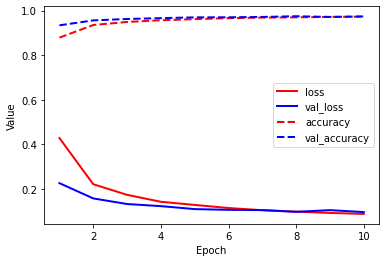

In [41]:
plot_curve(history)

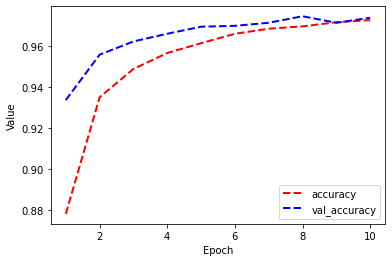

In [44]:
plot_curve(history, show_loss=False) # zoom in to accuracies
# there is no gap now, and accuracy is still high

In [42]:
regularized_model.evaluate(X_test_normalized, y_test_encoded)

313/313 [==============================] - 1s 3ms/step - loss: 0.1053 - categorical_accuracy: 0.9700


[0.10534656047821045, 0.9700000286102295]

Although adding dropout also reduced loss on test set a bit, the model is definitely not fitted to train data too much, which can be positive for inference on some other data, whose distribution differs from the distributions of train and test data(which appear to be very similar, based on above experiments results).